In [ ]:
import pandas as pd
import xlrd
import json
import matplotlib.pyplot as plotter


In [147]:
# df = pd.read_excel (r'trialData.xlsx')
df = xlrd.open_workbook('trialData.xlsx')
sheet = df.sheet_by_name('Sheet1')

In [148]:
rdata = [[sheet.cell_value(r, c) for c in range(sheet.ncols)] for r in range(sheet.nrows)]

In [ ]:
# rdata = pd.DataFrame(df, columns= ['Country'])
# df.as_matrix(columns=[df[1:]])
# print (rdata)
# json.dumps(rdata)

In [193]:
rdata = [[sheet.cell_value(r, c) for c in range(sheet.ncols)] for r in range(sheet.nrows)]
my_data_dict = {}
temp_dict = {}
pieLabels = []
share = []
rdata.pop(0)
last = rdata.pop(-1)
i = 0
for rd in rdata:
    temp_dict.clear()
    rd.pop(0)
    if rd[1] != "" or rd[2] != "":
        # pieLabels.append(rd[0])
        # print(type(rd[1]))
        # share.append((rd[1] /last[2]))
        my_data_dict.update({rd[0]:rd[2]})
        # my_data_dict.update({rd[0]:{'amount':rd[1], 'share':rd[2]}})
    else:
        pass
# print(share)
# sort_orders_dict = sorted(my_data_dict.items(), key=lambda x: x[1], reverse=True)
for (key, value) in sorted(my_data_dict.items(), key=lambda x: x[1], reverse=True):
    pieLabels.append(key)
    share.append(value)
    if i > 7 :
        break
    else:
        i += 1
pieLabels.append("Other Countries")
share.append(100 - sum(share))
# print(share)

In [159]:
with open('data.json', 'w') as outfile:
    json.dump(sort_orders_dict, outfile)

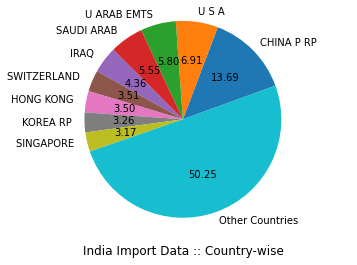

In [195]:
figureObject, axesObject = plotter.subplots()
axesObject.pie(share, labels=pieLabels, autopct='%1.2f', startangle=20)
axesObject.axis('equal')
axesObject.set_title("India Import Data :: Country-wise", y=-0.15)
plotter.show()